In [1]:
import torch 
import torchvision 
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader
from torchvision import datasets 
from torchvision import transforms
from torch import nn

import torch.nn.functional as F

In [2]:
trans = transforms.Compose([transforms.ToTensor(), 
                            transforms.Normalize(mean = 0.5, std = 0.5)
                           ])

training_data = datasets.MNIST( root = "data", 
                                train = True, 
                                download = True, 
                                transform = trans
                            )

validation_data = datasets.MNIST(   root = "data",
                                    train = False, 
                                    download = True, 
                                    transform= trans 
                                )

In [21]:
training_data[10]

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.000

In [22]:
training_data.class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [24]:
image, label = training_data[12] 

classes = training_data.classes

print(classes)

print(image.shape)
print(image.dtype)
print(classes[label])

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
torch.Size([1, 28, 28])
torch.float32
3 - three


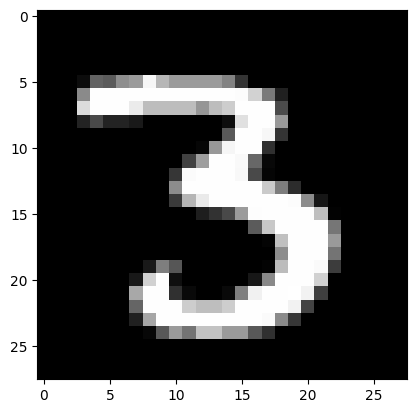

In [26]:
plt.imshow(image.reshape(28,28), cmap = "gray") 
plt.show()

In [27]:
training_dataloader = DataLoader(dataset = training_data, batch_size = 64, shuffle = True)

test_dataloader = DataLoader(dataset = validation_data, batch_size = 64, shuffle = True)

In [28]:
training_dataloader.dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )

In [ ]:
class LeNet(nn.Module):

  def __init__(self):
    super(LeNet, self).__init__() 
    self.conv1 = nn.Conv2d(1,6,5) 
    self.pool1 = nn.MaxPool2d(2,2) 
    self.conv2 = nn.Conv2d(6,16,5) 
    self.pool2 = nn.MaxPool2d(2,2) 
    self.fc1 = nn.Linear(16*4*4, 120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10) 


  def forward(self,x):
    x = self.pool1(F.relu(self.conv1(x))) 
    x = self.pool2(F.relu(self.conv2(x))) 
    x = torch.flatten(x,1) 
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x)) 
    logits = self.fc3(x) 
    return logits